1.Problem Statement

GIven the information for a segment of learners we are tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics. Bascially this algorithm is used by the sales team to give more info backed by proof to the learner.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = "/content/drive/MyDrive/Business_case_datasets/scaler_data.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
#Getting the type of data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
len(df)

205843

In [ ]:
df.shape

(205843, 7)

In [ ]:
#getting list of all columns present in the df
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

2.Detect Null values & Outliers

In [ ]:
#gives us the count of unique records in the dataframe
df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

There are a few email ids with repeated hash values. It means that one person has worked for more than one organisation.

In [ ]:
#checking how many null values are present in each column in the data
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [ ]:
df.describe(include='all')

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205843.000000,205799,205843,205757.000000,2.058430e+05,153281,205843.000000
unique,NaN,37299,153443,NaN,NaN,1017,NaN
top,NaN,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,NaN,8337,10,NaN,NaN,43554,NaN
mean,103273.941786,NaN,NaN,2014.882750,2.271685e+06,NaN,2019.628231
std,59741.306484,NaN,NaN,63.571115,1.180091e+07,NaN,1.325104
min,0.000000,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,51518.500000,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,103151.000000,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,154992.500000,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


In [ ]:
df.index = np.arange(1,df.shape[0]+1)
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
2,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
3,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
4,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
5,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
2,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
3,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
4,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
5,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


Mean/ KNN Imputation

Regex for cleaning company names

Standardization & Encoding

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
df['orgyear'] = imputer.fit_transform(df[['orgyear']])

In [ ]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
clean_text = df['company_hash'].str.replace(r'[^a-zA-Z0-9 ]+', '').str.replace(r'\s+', ' ').str.strip()
df['company_hash'] = clean_text
df.head()

<ipython-input-106-5ed3a3379a3f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_text = df['company_hash'].str.replace(r'[^a-zA-Z0-9 ]+', '').str.replace(r'\s+', ' ').str.strip()


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
2,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
3,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
4,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
5,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df.shape

(205843, 6)

In [ ]:
df2 = df[df.duplicated()]
df2.shape

(33, 6)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(205810, 6)

In [ ]:
df['Years of Experience'] = df['ctc_updated_year']- df['orgyear']
df.head()

<ipython-input-111-c2147a8cdc4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of Experience'] = df['ctc_updated_year']- df['orgyear']


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
1,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,4.0
2,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,1.0
3,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,5.0
4,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,2.0
5,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,2.0


In [ ]:
df.isnull().sum()

company_hash              44
email_hash                 0
orgyear                    0
ctc                        0
job_position           52547
ctc_updated_year           0
Years of Experience        0
dtype: int64

In [ ]:
df.dropna(subset=['company_hash'],inplace=True)

In [ ]:
df.isnull().sum()

company_hash               0
email_hash                 0
orgyear                    0
ctc                        0
job_position           52516
ctc_updated_year           0
Years of Experience        0
dtype: int64

In [ ]:
df[df['job_position'].isnull()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
9,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0,-1.0
10,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0,0.0
13,mvqwrvjo wgqugqvnt mvzpxzs,7f24d2f5171ea469482a9966832237bc023678883ecd0c...,2020.0,800000,NaN,2020.0,0.0
18,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...,2020.0,1400000,NaN,2019.0,-1.0
19,mvlvl exzotqc,62d2e04b44c8bf2f6ec15d5b4c259c06199f598dc51816...,2018.0,100000,NaN,2021.0,3.0
...,...,...,...,...,...,...,...
205839,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0,11.0
205840,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0,3.0
205841,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0,0.0
205842,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0,0.0


In [ ]:
df['job_position'] = df['job_position'].fillna('Unspecified')

In [ ]:
df[df['job_position'].isnull()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience


In [ ]:
df.shape

(205766, 7)

In [ ]:
df.loc[df['Years of Experience']<0]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience
9,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,Unspecified,2019.0,-1.0
18,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...,2020.0,1400000,Unspecified,2019.0,-1.0
41,rvqotz nghmqg,96b1eb6b3ba24764239d502e3e5d9353af9dbd20594534...,2021.0,2500000,Other,2020.0,-1.0
49,rgfto wgbuvzxto xzw,7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...,2020.0,3010000,Unspecified,2019.0,-1.0
57,axztqg xzzgcvnxgz ucn rna,3a8a6f0924d0d337eb63d8f6c6b6a3608913b7e4c95353...,2020.0,700000,Frontend Engineer,2019.0,-1.0
...,...,...,...,...,...,...,...
205797,zgn vuurxwvmrt,e5ef043e885543843a2ffc11e18ba1662194512592b442...,2021.0,19800000,Unspecified,2019.0,-2.0
205799,ztw wgqugqvnxgz,7538a084adebf36d36fd425c362fdc1ae0409e7623ad08...,2020.0,800000,Unspecified,2019.0,-1.0
205802,zgn vuurxwvmrt,03dea5143d030be1e5040ac960f2eeb4f42e2f4882d182...,2019.0,1800000,Unspecified,2016.0,-3.0
205805,myvqvn trtwnqgzxwo rxbxnta,f0545c8d78cb9f797462e4e4d8da76f01ca38b41be3388...,2022.0,1000000,Unspecified,2020.0,-2.0


In [ ]:
#There are some rows where orgyear is greater than ctcupdated year
#this is wrong according to the question definition, hence dropping such rows

In [ ]:
df = df[df['Years of Experience'] >= 0]

In [ ]:
df.loc[df['Years of Experience']<0]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience


In [ ]:
df.shape

(196934, 7)

In [ ]:
df.isnull().sum()

company_hash           0
email_hash             0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
Years of Experience    0
dtype: int64

In [ ]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'Years of Experience'],
      dtype='object')

In [ ]:
df.nunique()

company_hash            36275
email_hash             146477
orgyear                    64
ctc                      3279
job_position              995
ctc_updated_year            7
Years of Experience        69
dtype: int64

In [ ]:
df.shape

(196934, 7)

<Axes: xlabel='orgyear', ylabel='Count'>

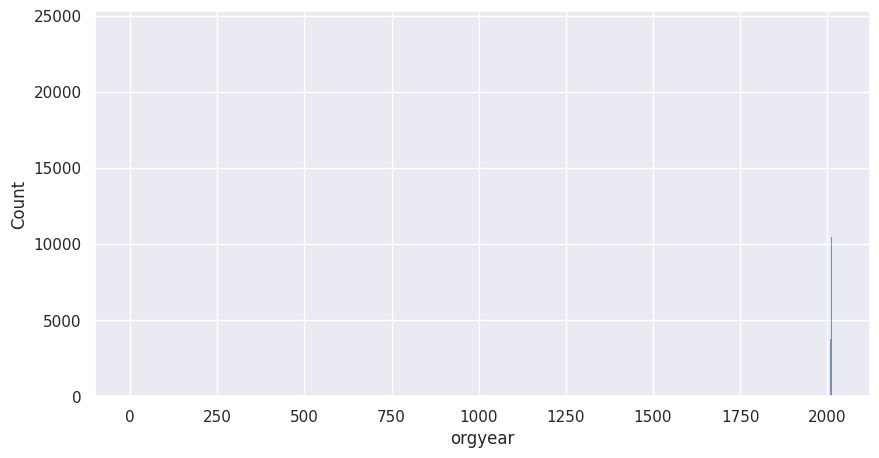

In [ ]:
sns.histplot(x=df["orgyear"])

<Axes: xlabel='ctc', ylabel='Count'>

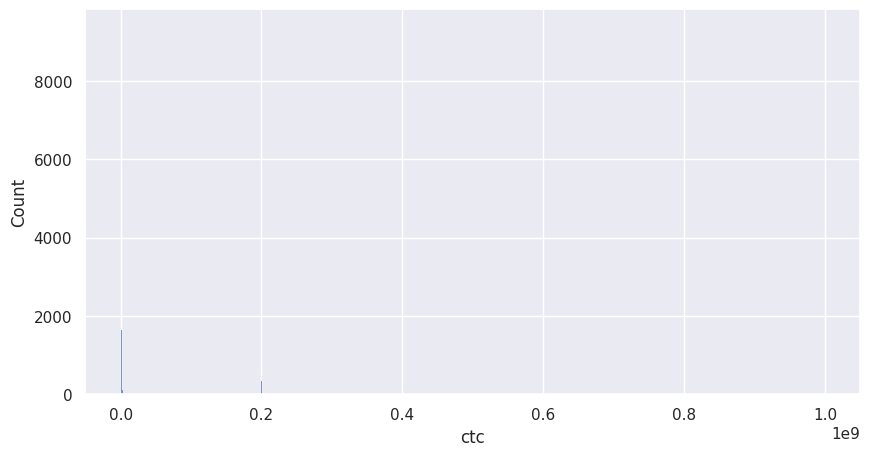

In [ ]:
sns.histplot(x=df["ctc"])

<Axes: xlabel='Years of Experience', ylabel='Count'>

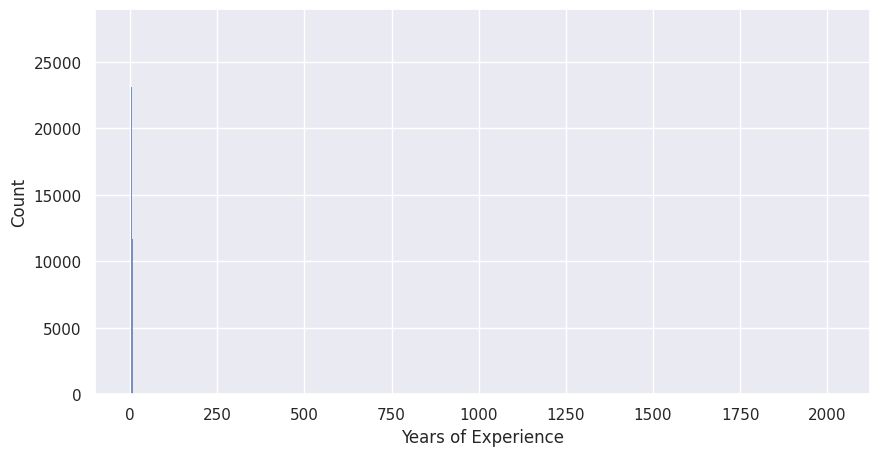

In [ ]:
sns.histplot(x=df["Years of Experience"])

<Axes: ylabel='orgyear'>

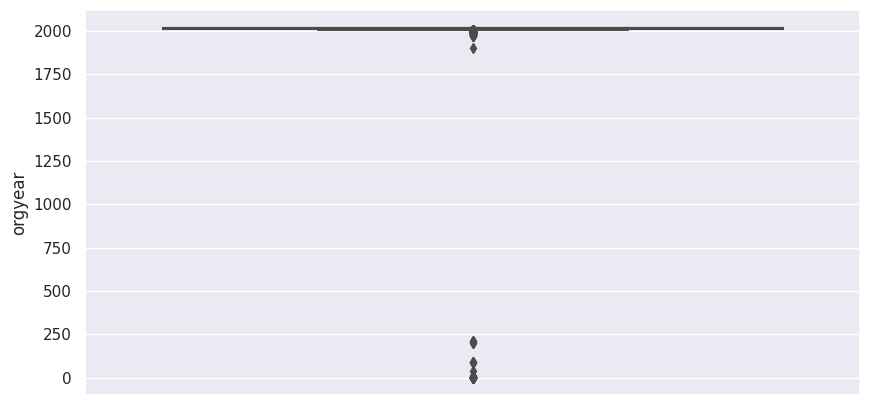

In [ ]:
sns.boxplot(y=df['orgyear'])

<Axes: ylabel='ctc'>

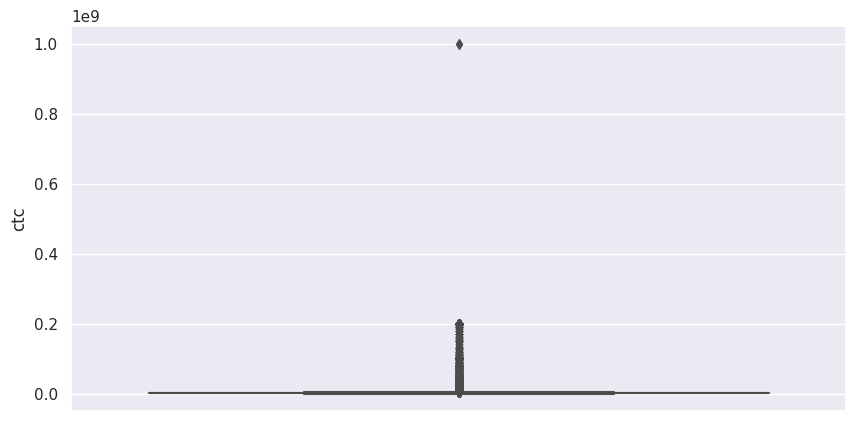

In [ ]:
sns.boxplot(y=df['ctc'])

<Axes: ylabel='Years of Experience'>

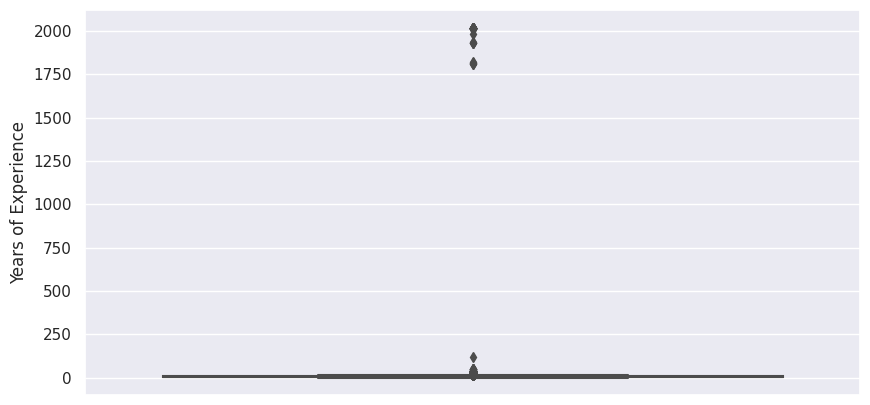

In [ ]:
sns.boxplot(y=df['Years of Experience'])

<Axes: xlabel='job_position', ylabel='count'>

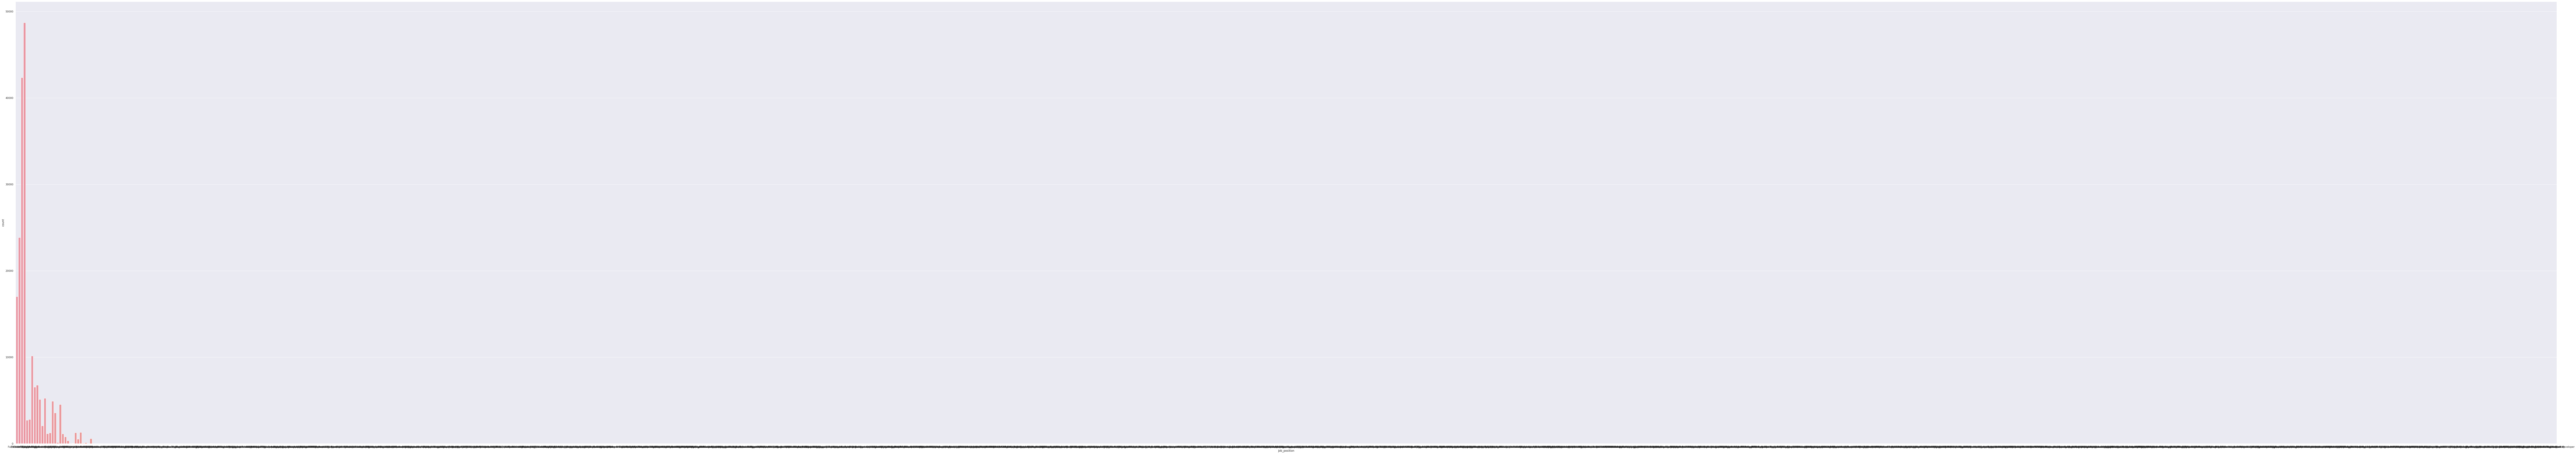

In [ ]:
plt.figure(figsize=(200,35))
sns.countplot(x=df['job_position'])

In [ ]:
df = df[(df['orgyear'] > 1700)]

In [ ]:
df.shape

(196891, 7)

In [ ]:
df.nunique()

company_hash            36263
email_hash             146440
orgyear                    49
ctc                      3279
job_position              995
ctc_updated_year            7
Years of Experience        53
dtype: int64

In [ ]:
df = df[df.groupby('company_hash').company_hash.transform('count')>5].copy()

In [ ]:
df.shape

(147271, 7)

In [ ]:
def q25(x):
    return x.quantile(0.25)

In [ ]:
def q75(x):
    return x.quantile(0.75)

In [ ]:
def assign_level(row):
    if row['ctc'] < row['q25']:
        return 4
    elif (row['ctc'] < row['q75'] and row['ctc'] >= row['q25']):
        return 3
    elif (row['ctc'] < row['max'] and row['ctc'] >= row['q75']):
        return 2
    elif row['ctc'] >= row['max']:
        return 1

In [ ]:
grouped = df.groupby(['company_hash'])['ctc'].agg(['min', 'max', q25, q75]).reset_index()

# Rename the columns for clarity
# grouped.columns = ['Company Hash', 'Min Salary', 'Max Salary', '25th Quantile Salary', '75th Quantile Salary']

# Merge the statistics back into the original DataFrame
merged_df = df.merge(grouped, on=['company_hash'], how='left')

# Add the 'Salary Level' column based on the quartiles
merged_df['ctc_level'] = merged_df.apply(assign_level, axis=1)
merged_df.drop(['min','max','q25','q75'],axis=1,inplace=True)

In [ ]:
# Group by 'Company Name' and 'Job Position' and calculate statistics
grouped = merged_df.groupby(['company_hash', 'job_position'])['ctc'].agg(['min', 'max', q25, q75]).reset_index()

# Rename the columns for clarity
# grouped.columns = ['Company Name', 'Job Position', 'Min Salary', 'Max Salary', '25th Quantile Salary', '75th Quantile Salary']

# Merge the statistics back into the original DataFrame
merged_df = merged_df.merge(grouped, on=['company_hash', 'job_position'], how='left')


# Add the 'Salary Level' column based on the quartiles
merged_df['pos_level'] = merged_df.apply(assign_level, axis=1)
merged_df.drop(['min','max','q25','q75'],axis=1,inplace=True)

In [ ]:
# Group by 'Company Name' and 'Job Position' and Years of Experience and calculate statistics
grouped = merged_df.groupby(['company_hash', 'job_position','Years of Experience'])['ctc'].agg(['min', 'max', q25, q75]).reset_index()

# Rename the columns for clarity
# grouped.columns = ['Company Name', 'Job Position', 'Min Salary', 'Max Salary', '25th Quantile Salary', '75th Quantile Salary']

# Merge the statistics back into the original DataFrame
merged_df = merged_df.merge(grouped, on=['company_hash', 'job_position','Years of Experience'], how='left')


# Add the 'Salary Level' column based on the quartiles
merged_df['joining_level'] = merged_df.apply(assign_level, axis=1)
merged_df.drop(['min','max','q25','q75'],axis=1,inplace=True)

In [ ]:
merged_df.shape

(147271, 10)

In [ ]:
merged_df.index = np.arange(1,merged_df.shape[0]+1)
merged_df.head(5)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,ctc_level,pos_level,joining_level,encoded_job_position
1,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,4.0,3,1,1,338
2,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,1.0,4,4,4,208
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,2.0,4,4,4,107
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,2.0,1,1,1,208
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,2.0,3,1,1,208


In [ ]:
merged_df1 = merged_df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_data = le.fit_transform(merged_df1['job_position'].tolist())
merged_df1['encoded_job_position'] = encoded_data

In [ ]:
merged_df.nunique()

company_hash              3079
email_hash              106926
orgyear                     45
ctc                       2927
job_position               792
ctc_updated_year             7
Years of Experience         48
ctc_level                    4
pos_level                    4
joining_level                4
encoded_job_position       792
dtype: int64

In [ ]:
df = merged_df[['ctc','Years of Experience','ctc_level','pos_level','joining_level']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147271 entries, 1 to 147271
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ctc                  147271 non-null  int64  
 1   Years of Experience  147271 non-null  float64
 2   ctc_level            147271 non-null  int64  
 3   pos_level            147271 non-null  int64  
 4   joining_level        147271 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 6.7 MB


In [ ]:
df = df.astype({'ctc':'float64','ctc_level':'float64','pos_level':'float64','joining_level':'float64'})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.cluster import KMeans
k=4 # random value
kmeans = KMeans(n_clusters = k,random_state=42)
y_pred = kmeans.fit_predict(X)
print(y_pred[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 1 2 2 0 0 1 3 3]


In [ ]:
print(kmeans.cluster_centers_)

[[0.00591257 0.08482664 0.71012168 0.77124321 0.06402728]
 [0.00288185 0.05871788 0.96351952 0.98462208 0.94036845]
 [0.0222365  0.11550579 0.43292701 0.15906067 0.06767309]
 [0.00608092 0.08405495 0.63958502 0.63670783 0.73692869]]


In [ ]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = kmeans.labels_
clusters.head(15)

,ctc,Years of Experience,ctc_level,pos_level,joining_level,label
0,0.00550,0.078431,0.666667,0.000000,0.000000,2
1,0.00225,0.019608,1.000000,1.000000,1.000000,1
2,0.00350,0.039216,1.000000,1.000000,1.000000,1
3,0.00700,0.039216,0.000000,0.000000,0.000000,2
4,0.00350,0.039216,0.666667,0.000000,0.000000,2
5,0.00750,0.019608,0.666667,0.666667,0.333333,0
6,0.00200,0.000000,1.000000,1.000000,0.000000,0
7,0.00210,0.019608,1.000000,1.000000,1.000000,1
8,0.00400,0.000000,1.000000,0.666667,0.666667,3
9,0.00220,0.078431,0.666667,0.666667,0.666667,3


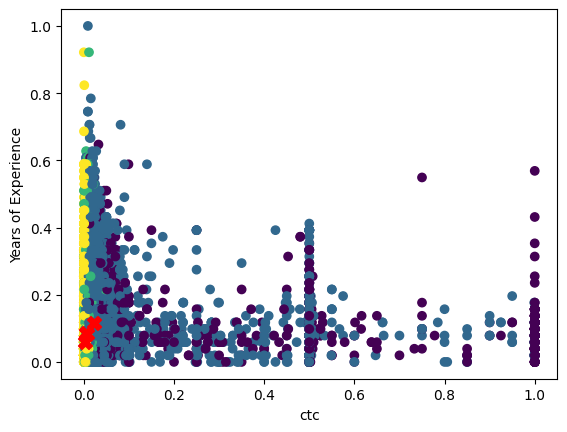

In [ ]:
def viz_clusters(kmeans):
    plt.scatter(clusters['ctc'], clusters['Years of Experience'], c=clusters['ctc_level'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('ctc')
    plt.ylabel('Years of Experience')

viz_clusters(kmeans)

In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

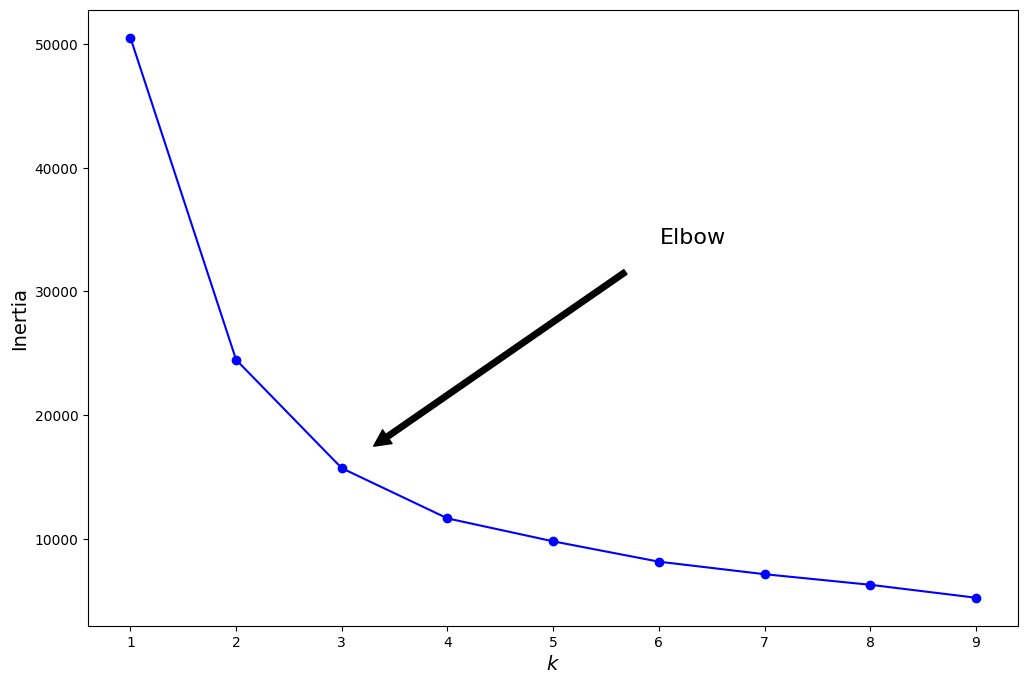

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [ ]:
df.shape

(147271, 5)

In [ ]:
merged_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,ctc_level,pos_level,joining_level,encoded_job_position
1,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,4.0,3,1,1,338
2,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,1.0,4,4,4,208
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,2.0,4,4,4,107
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,2.0,1,1,1,208
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0,2.0,3,1,1,208


In [ ]:
df = merged_df[merged_df.groupby('company_hash').company_hash.transform('count')>1000].copy()

In [ ]:
df['company_hash'].value_counts()

nvnv wgzohrnvzwj otqcxwto    7971
xzegojo                      5169
vbvkgz                       3287
zgn vuurxwvmrt vwwghzn       3253
wgszxkvzn                    3144
vwwtznhqt                    2759
fxuqg rxbxnta                2598
gqvwrt                       2454
bxwqgogen                    2005
wvustbxzx                    1963
ywr ntwyzgrgsxto             1381
vagmt                        1364
zvz                          1331
uvjnb                        1119
lubgqsvz wyvot wg            1076
eqtoytq                      1073
xmb                          1021
Name: company_hash, dtype: int64

In [ ]:
df = df.groupby(['company_hash']).agg({'ctc':'mean','Years of Experience':'mean','ctc_level':'mean','pos_level':'mean','joining_level':'mean'})

In [ ]:
df.index.name = None

In [ ]:
df.isna().sum()

ctc                    0
Years of Experience    0
ctc_level              0
pos_level              0
joining_level          0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

<Axes: >

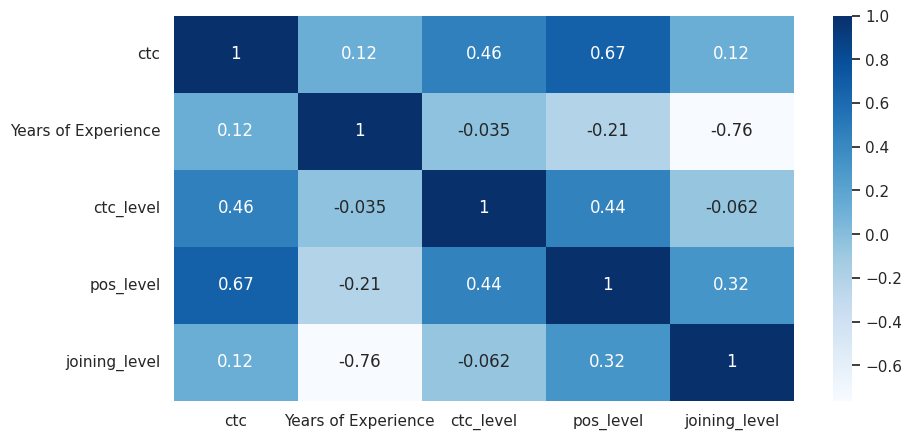

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.heatmap(scaled_df.corr(),annot=True,cmap="Blues")

In [ ]:
scaled_df

,ctc,Years of Experience,ctc_level,pos_level,joining_level
bxwqgogen,1.946115,0.612818,1.176916,1.368769,0.251590
eqtoytq,-0.053735,-2.579615,0.186802,1.357884,1.498463
fxuqg rxbxnta,0.093039,-0.736607,0.480691,-0.062499,-0.141015
gqvwrt,-0.661323,0.843271,-1.467125,-0.324068,0.130914
lubgqsvz wyvot wg,0.639221,1.778681,0.731854,0.941042,-1.364088
nvnv wgzohrnvzwj otqcxwto,-0.813333,-0.865153,-0.604080,-0.133855,1.624115
uvjnb,-0.317973,0.046968,1.030652,0.457504,-0.222867
vagmt,1.258706,0.584566,0.960319,0.672132,-0.479153
vbvkgz,2.015871,-0.395309,0.989987,0.883759,1.157576
vwwtznhqt,0.480312,-0.143222,-0.938635,0.354351,0.208736


In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

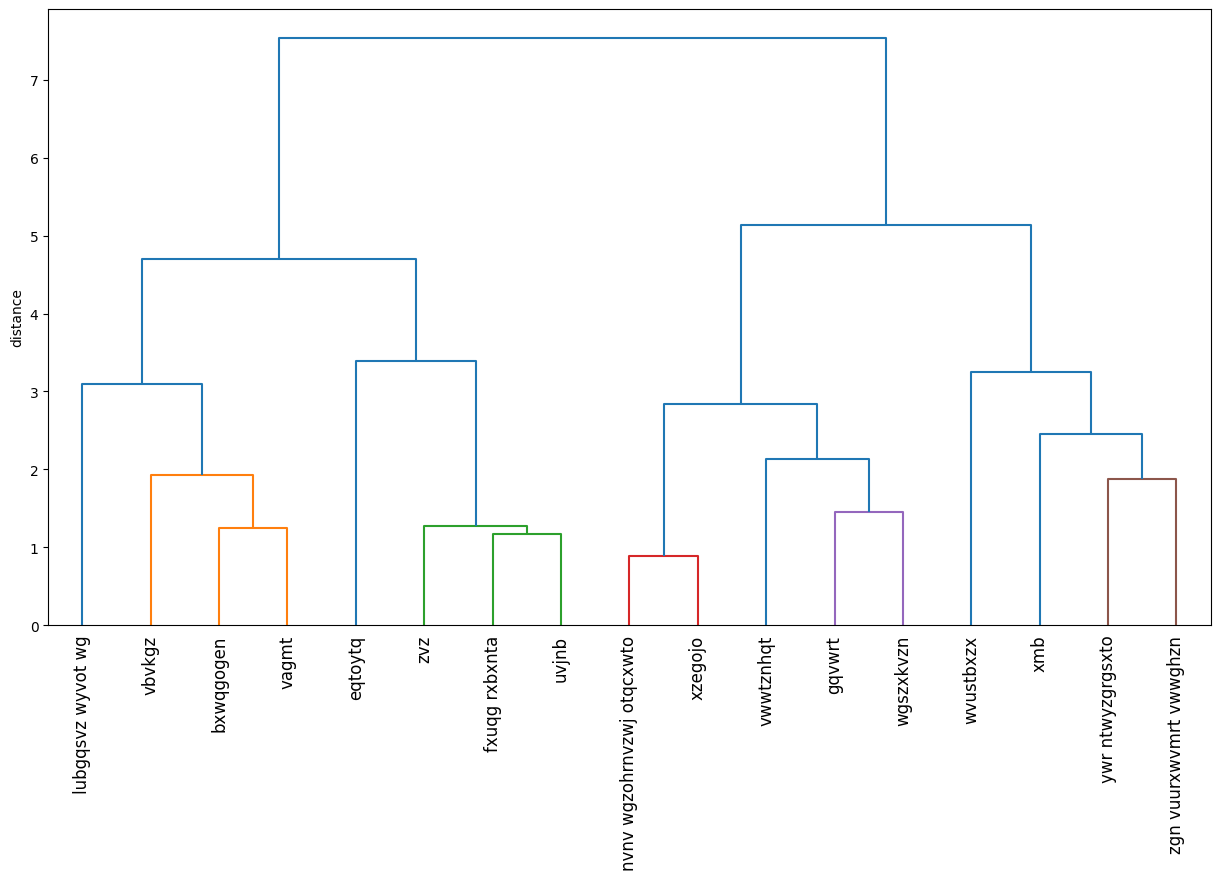

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Text(0, 0.5, 'distance')

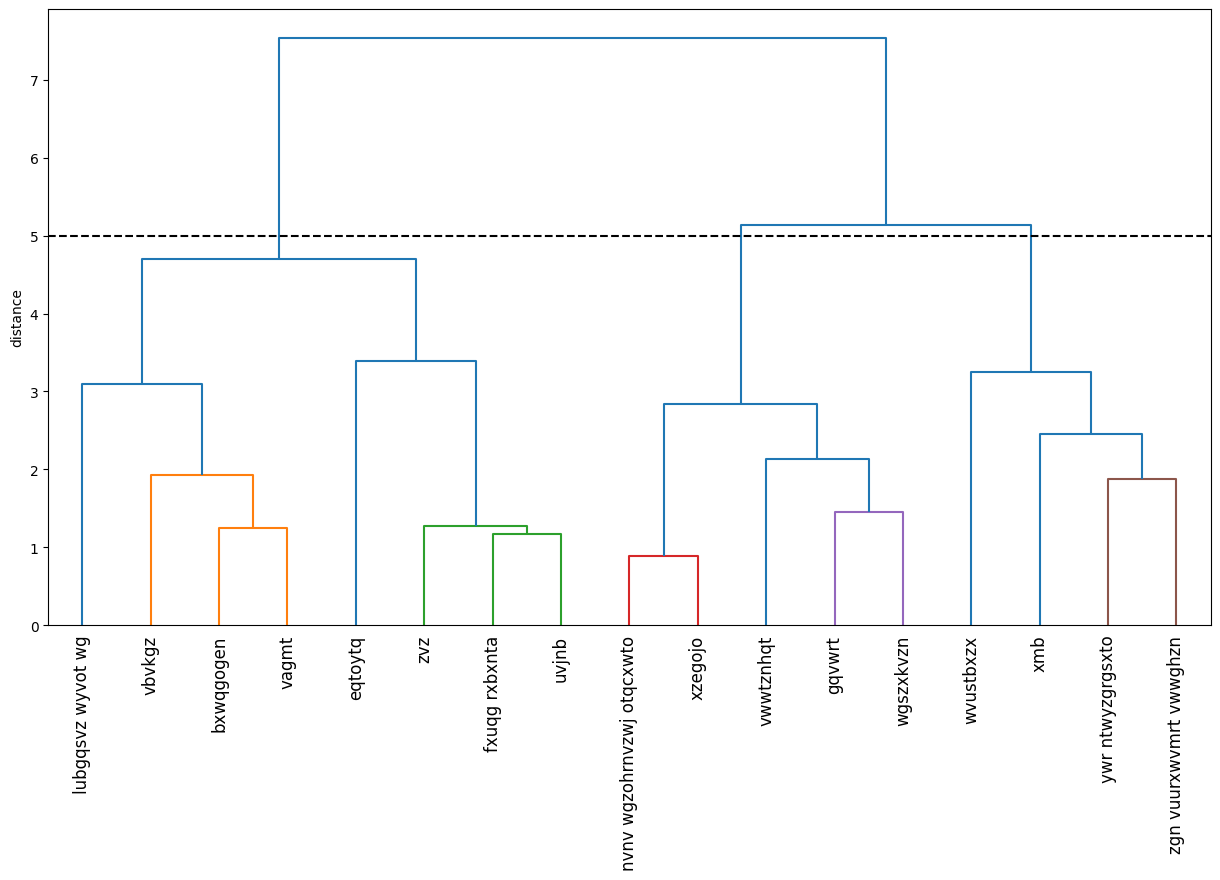

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=5, color='k', linestyle='--')
ax.set_ylabel('distance')

Actionable Insights & Recommendations

1.There are a few rows having same email hash, this means same people have switched multiple companies

2.CTC and position level has strong positive correlation in the same companies

3.Since people having same featues/characteristics are grouped together, the number of clusters can be ideally between 3 and 4

4.Now based on the clustering done, the sales team can tell the end customer based on joining level, YoE and current ctc the expected ctc after joining and completing the course

5.Based on the data, there are a lot of ctc levels where it is either too low or very high, but the median is almost equal to mean, therefore we can consider at the entire data level, there are no outliers

6. There are some rows where orgyear is greater than ctcupdated year.This is wrong according to the question definition, hence dropping such rows

